In [1]:
import hdbscan

import laspy
import logging
import pathlib
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from shapely.geometry import Point, shape

1. Use HDBSCAN to cluster the 2d points and isolate riprap cloud

2. project 3d points to 2d image plane

3. Use Segment Anything model to segment the riprap stones

4. Calculate the volume of the riprap stones

# Process Point Cloud Data

In [2]:
# def parse_las_point_cloud(
#         file_path: str, output_filename: str, 
#         output_folder:str = None, 
#         format='hdf5',
#         save_to_disk: bool = True
#         ):
#     logging.basicConfig(level=logging.INFO)

#     # parse file path arguments
#     folder, filename = parse_input_file(file_path)
#     full_file_path = folder / filename

#     # validate output folder
#     if output_folder is None:
#         output_folder = pathlib.Path(__file__).parent
#         if str(output_folder).contains("notebooks"):
#             output_folder = pathlib.Path(__file__).parent.parent / "data"
#         else:
#             output_folder = pathlib.Path(__file__).parent / "data"
#     validate_output_file(output_folder)
#     output_file_path = output_folder / output_filename

#     try:
#         # read las file
#         las = laspy.read(full_file_path)
#         # check number of points
#         num_points = len(las.points)
#         logging.info(f"Processing {num_points} points from {filename}")
#         # create dataframe
#         point_df = process_las_data(las)
#         # save results
#         if format == 'hdf5' and save_to_disk:
#             point_df.to_hdf(output_file_path, key='df', mode='w')
#             logging.info(f"Saved parsed data to {output_file_path}")
    
#     except Exception as e:
#         logging.error(f"Error processing {filename}: {e}")

#     return point_df

# def parse_input_file(input_file: str) -> tuple[str, str]:
#     folder = pathlib.Path(input_file).parent
#     filename = pathlib.Path(input_file).name
#     return folder, filename

# def validate_output_file(output_folder: pathlib.Path) -> None:
#     if not output_folder.exists():
#         output_folder.mkdir(parents=True, exist_ok=True)
#         logging.info(f"Output folder '{output_folder}' did not exist. Created successfully.")
#     elif not output_folder.is_dir():
#         raise NotADirectoryError(f"Output path '{output_folder}' is not a directory.")

# def process_las_data(las: laspy.file.File) -> pd.DataFrame:
#     data = set(zip(
#         las['X'] * las.header.scale[0] + las.header.offset[0], 
#         las['Y'] * las.header.scale[1] + las.header.offset[1], 
#         las['Z'] * las.header.scale[2] + las.header.offset[2], 
#         las['red'], 
#         las['green'], 
#         las['blue'],
#     ))
#     data_df = pd.DataFrame(list(data), columns = ['x', 'y', 'z', 'r', 'g', 'b'])
#     return data_df

# process point cloud
# data = parse_las_point_cloud(
#         file_path = "rockie/rockie/src/raw_data/Flood Monument East.las", 
#         output_filename = "tabular_point_cloud.h5", 
#         output_dir = "rockie/rockie/src/data",
#         )

In [3]:
data_df = pd.read_hdf("/home/saul/workspace/rockie/rockie/src/data/processed_data/tabular_point_cloud.h5")

In [14]:
def visualize_3d_pc(pc_data: pd.DataFrame):
    df_columns = pc_data.columns
    x = pc_data[df_columns[0]]
    y = pc_data[df_columns[1]]
    z = pc_data[df_columns[2]]
    r = pc_data[df_columns[3]]
    g = pc_data[df_columns[4]]
    b = pc_data[df_columns[5]]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=np.vstack((r, g, b)).T / 255)
    plt.show()

def visualize_2d_pc(pc_data: pd.DataFrame):
    df_columns = pc_data.columns
    x = pc_data[df_columns[0]]
    y = pc_data[df_columns[1]]
    r = pc_data[df_columns[3]]
    g = pc_data[df_columns[4]]
    b = pc_data[df_columns[5]]
    fig, ax = plt.subplots()
    ax.scatter(x, y, c=np.vstack((r, g, b)).T / 255)
    plt.show()

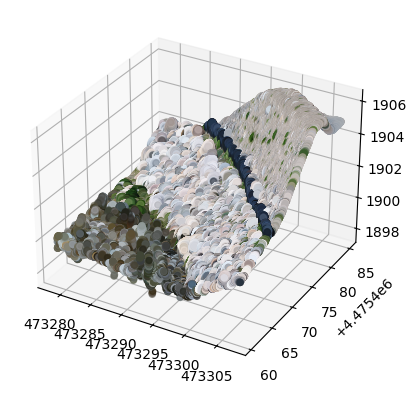

In [5]:
visualize_3d_pc(data_df)

# Extract riprap stones from point cloud data using Shape File

In [6]:
# # Load shapefile polygon
# shapefile_path = "/home/saul/workspace/rockie/rockie/src/data/processed_data/boundary.shp"
# gdf = gpd.read_file(shapefile_path)

# # Assuming your point coordinates are in a list of tuples, for example:
# # [(x1, y1), (x2, y2), ...]
# points = data_df[['x', 'y']].values

# # Create a shapely polygon object
# polygon = shape(gdf["geometry"].iloc[0])  # Assuming there's only one polygon in the shapefile

# # Check if each point is inside the polygon
# mask = [polygon.contains(Point(p)) for p in points]

In [7]:
# riprap_df = data_df[mask]
# riprap_df.to_hdf("/home/saul/workspace/rockie/rockie/src/data/processed_data/riprap_point_cloud.h5", key='df', mode='w')

In [8]:
riprap_df = pd.read_hdf("/home/saul/workspace/rockie/rockie/src/data/processed_data/riprap_point_cloud.h5")

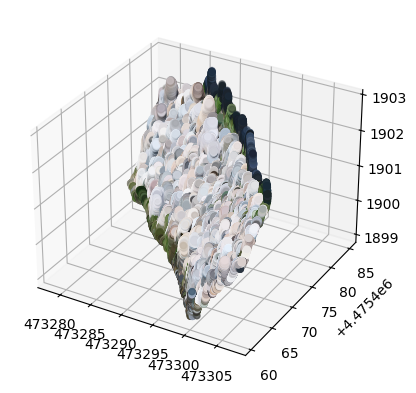

In [9]:
visualize_3d_pc(riprap_df)

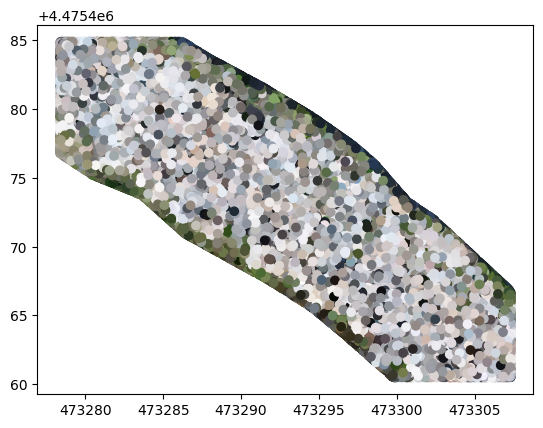

In [16]:
visualize_2d_pc(riprap_df)

# Clustering

In [10]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
# cluster_labels = clusterer.fit_predict(riprap_df.values)

In [11]:
# df_subset = riprap_df[cluster_labels == -1]
# # plot most common clusters
# visualize_3d_pc(df_subset)

In [12]:
# n_cluster = len(np.unique(cluster_labels))
# print(f"Number of clusters: {n_cluster}")

# labels = np.unique(cluster_labels)
# print(f"Labels: {labels}")

# cluster_sizes = np.bincount(cluster_labels + 1)
# print(f"Cluster sizes: {cluster_sizes}")

# Segmentation

In [ ]:
# look at this later: 
# https://towardsdatascience.com/segment-anything-3d-for-point-clouds-complete-guide-sam-3d-80c06be99a18
# https://www.kaggle.com/code/mrinalmathur/segment-anything-model-tutorial

In [ ]:
plt.imshow()